# K-means clustering
To determine correct no. of clusters(k), Elbow technique is used.

## import libraries and collect data

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("data/income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


## Analyze data

<AxesSubplot:xlabel='Age', ylabel='Income($)'>

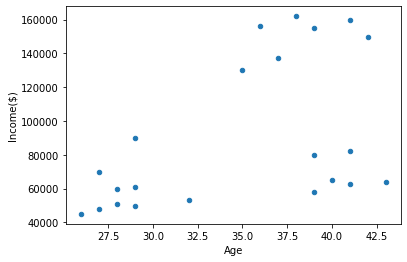

In [5]:
df.plot.scatter("Age", 'Income($)')

## Create model-1

In [9]:
mymodel = KMeans(n_clusters=3)
Y_predicted = mymodel.fit_predict(df[["Age", "Income($)"]])
Y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [10]:
df["cluster"] = Y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


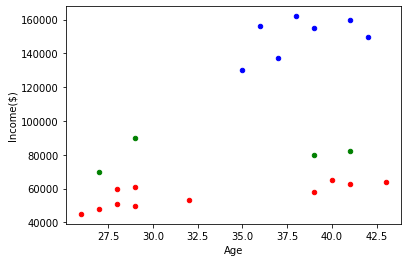

In [12]:
df0 = df[df["cluster"] == 0]
df1 = df[df["cluster"] == 1]
df2 = df[df["cluster"] == 2]

ax = df0.plot.scatter("Age", "Income($)", color="green")
ax = df1.plot.scatter("Age", "Income($)", color="blue", ax=ax)
ax = df2.plot.scatter("Age", "Income($)", color="red", ax=ax)

Above clustering didn't occur correctly because data is not correctly scaled.

# Remodelling.. by scaling

In [17]:
scaler = MinMaxScaler()

scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])

scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


## Create model-2

In [18]:
mymodel = KMeans(n_clusters=3)
Y_predicted = mymodel.fit_predict(df[["Age", "Income($)"]])
Y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [21]:
df["cluster"] = Y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [22]:
mymodel.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

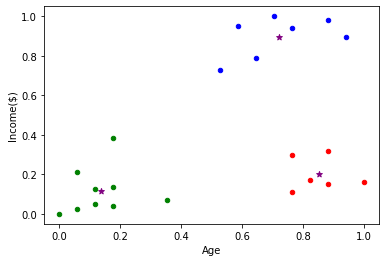

In [31]:
df0 = df[df["cluster"] == 0]
df1 = df[df["cluster"] == 1]
df2 = df[df["cluster"] == 2]

ax = df0.plot.scatter("Age", "Income($)", color="green")
ax = df1.plot.scatter("Age", "Income($)", color="blue", ax=ax)
ax = df2.plot.scatter("Age", "Income($)", color="red", ax=ax)
ax = plt.scatter(mymodel.cluster_centers_[:,0], mymodel.cluster_centers_[:,1], color="purple", marker="*")

#### Calculating optimal no. of clusters (using elbow technique)

In [32]:
k_range = range(1,10)
sse = []
for k in k_range:
    mymodel = KMeans(n_clusters=k)
    mymodel.fit(df[["Age","Income($)"]])
    sse.append(mymodel.inertia_)
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.2761293767785354,
 0.2240700655178815,
 0.16858512236029757,
 0.13988845206128503,
 0.1062989742140513]

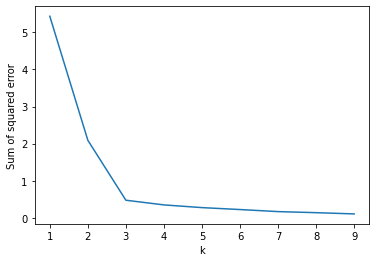

In [34]:
plt.xlabel("k")
plt.ylabel("Sum of squared error")
plt.plot(k_range, sse)

Hence no. of optimal clusters is 3